<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo-52/blob/main/Reto%20-%20Entrega%201_prueba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> # **Reto - Entrega 1**
>### **Maestría en Inteligencia Artificial Aplicada**
>### **Curso: Inteligencia Artificial y Aprendizaje Automático**
>### **Tecnológico de Monterrey**
>### **Prof: María de la Paz Rico Fernández**

### **Genaro Ramos Higuera - A00351269**
### **Gerardo Aaron Castañeda Jaramillo - A01137646**

# **Limpieza, análisis, visualización y agrupamiento.**

In [41]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt 
import seaborn as sns 

import requests
import zipfile as zf
from io import BytesIO
import decimal

In [42]:
def zip_to_df(url, filename, separator):

  print('Downloading started')
  # Split URL to get the file name
  req = requests.get(url)

  foldername = url.split('/')[-1].split('.')[-2]
  print('Downloading Completed') 

  # extracting the zip file contents
  zipfile= zf.ZipFile(BytesIO(req.content))
  zipfile.extractall('/content/sample_data/' + foldername)
  df = pd.read_csv("/content/sample_data/" + foldername + '/Datos_de_calidad_del_agua_2020/' + filename,sep=separator,encoding='latin-1')

  return df

## **Aguas subterraneas**

In [43]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

df_asub = zip_to_df(url,'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',',')
df_asub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [44]:
asub = df_asub.copy()
asub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

Donde:
* 0 - CLAVE: es como un ID
* 1 - SITIO: es categorica sobre ubicacion
* 2 - ORGANISMO_DE_CUENCA: categorica que identifica al responsables de administrar y preservar las aguas nacionales en cada una de las trece regiones hidrológico-administrativas en que se ha dividido el país
* 3 - ESTADO: categorica sobre el estado en que esta ubicado
* 4 - MUNICIPIO: categorica sobre el municipio en que esta ubicado
* 5 - ACUIFERO: categorica sobre el acuifero al que pertenece
* 6 - SUBTIPO: categorica sobre el tipo de yacimiento al que pertenece
* 7 - LONGITUD: numerica y parte de coordenada geografica
* 8 - LATITUD: numerica y parte de coordenada geografica
* 9 - PERIODO: periodo de recoleccion de datos (todos son 2020)
* 10 - ALC_mg/L: numerica de calidad del agua para alcalinidad
* 11 - CALIDAD_ALC: categorica de calidad del agua para alcalinidad
* 12 - CONDUCT_mS/cm: numerica de calidad del agua para conductividad
* 13 - CALIDAD_CONDUC: categorica de calidad del agua para conductividad
* 14 - SDT_mg/L: numerica de calidad del agua para SOLIDOS DISUELTOS TOTALES (numerica vacia)
* 15 - SDT_M_mg/L: numerica de calidad del agua para solidos disueltos totales
* 16 - CALIDAD_SDT_ra: categorica de calidad del agua para solidos disueltos totales - riego agricola
* 17 - CALIDAD_SDT_salin: categorica de calidad del agua para solidos disueltos totales - SALINIZACION
* 18 - FLUORUROS_mg/L: numerica de calidad del agua para FLUORUROS
* 19 - CALIDAD_FLUO: categorica de calidad del agua para FLUORUROS
* 20 - DUR_mg/L: numerica de calidad del agua para DUREZA
* 21 - CALIDAD_DUR: categorica de calidad del agua para DUREZA
* 22 - COLI_FEC_NMP/100_mL: numerica de calidad del agua para COLIFORMES FECALES
* 23 - CALIDAD_COLI_FEC: categorica de calidad del agua para COLIFORMES FECALES
* 24 - N_NO3_mg/L: numerica de calidad del agua para NITROGENO DE NITRATOS 
* 25 - CALIDAD_N_NO3: categorica de calidad del agua para NITROGENO DE NITRATOS 
* 26 - AS_TOT_mg/L: numerica de calidad del agua para ARSENICO
* 27 - CALIDAD_AS: categorica de calidad del agua para ARSENICO
* 28 - CD_TOT_mg/L: numerica de calidad del agua para CADMIO
* 29 - CALIDAD_CD: categorica de calidad del agua para CADMIO
* 30 - CR_TOT_mg/L: numerica de calidad del agua para CROMO
* 31 - CALIDAD_CR: categorica de calidad del agua para CROMO
* 32 - HG_TOT_mg/L: numerica de calidad del agua para MERCURIO
* 33 - CALIDAD_HG: categorica de calidad del agua para MERCURIO
* 34 - PB_TOT_mg/L: numerica de calidad del agua para PLOMO
* 35 - CALIDAD_PB: categorica de calidad del agua para PLOMO
* 36 - MN_TOT_mg/L: numerica de calidad del agua para MANGANESO
* 37 - CALIDAD_MN: categorica de calidad del agua para MANGANESO
* 38 - FE_TOT_mg/L: numerica de calidad del agua para MANGANESO
* 39 - CALIDAD_FE: categorica de calidad del agua para MANGANESO
* 40 - SEMAFORO: categorica sobre si el agua es potable o no
* 41 - CONTAMINANTES: string de que contaminantes tiene, dependiente de las variables 10-39
* 42 - CUMPLE_CON_ALC: binaria sobre si cumple criterio de CALIDAD_ALC
* 43 - CUMPLE_CON_COND: binaria sobre si cumple criterio de CALIDAD_COND
* 44 - CUMPLE_CON_SDT_ra: binaria sobre si cumple criterio de CALIDAD_STD_ra
* 45 - CUMPLE_CON_SDT_salin: binaria sobre si cumple criterio de CALIDAD_STD_salin
* 46 - CUMPLE_CON_FLUO: binaria sobre si cumple criterio de CALIDAD_FLUO
* 47 - CUMPLE_CON_DUR: binaria sobre si cumple criterio de CALIDAD_DUR
* 48 - CUMPLE_CON_CF: binaria sobre si cumple criterio de CALIDAD_CF
* 49 - CUMPLE_CON_NO3: binaria sobre si cumple criterio de CALIDAD_NO3
* 50 - CUMPLE_CON_AS: binaria sobre si cumple criterio de CALIDAD_AS
* 51 - CUMPLE_CON_CD: binaria sobre si cumple criterio de CALIDAD_CD
* 52 - CUMPLE_CON_CR: binaria sobre si cumple criterio de CALIDAD_CR
* 53 - CUMPLE_CON_HG: binaria sobre si cumple criterio de CALIDAD_HG
* 54 - CUMPLE_CON_PB: binaria sobre si cumple criterio de CALIDAD_PB
* 55 - CUMPLE_CON_MN: binaria sobre si cumple criterio de CALIDAD_MN
* 56 - CUMPLE_CON_FE: binaria sobre si cumple criterio de CALIDAD_FE



### **Limpieza de base de datos:**

De entrada observamos que 'SDT_mg/L ' no tiene valores, asi que eliminamos la columna del dataframe:

In [45]:
asub.drop('SDT_mg/L', inplace=True, axis=1)

De igual manera observamos que existen dos valores de calidad para solidos disueltos totales, siendo una de ellas para uso agricola. Y solo nos interesa la de salinizacion, ya que es la que nos determina si es potable o no. Asi que la eliminamos lo referente a ella:

In [46]:
asub.drop('CALIDAD_SDT_ra', inplace=True, axis=1)
asub.drop('CUMPLE_CON_SDT_ra', inplace=True, axis=1)

Otra variable a visualizar, es la de periodo:

In [47]:
asub['PERIODO'].value_counts()

2020    1068
Name: PERIODO, dtype: int64

Donde observamos que todos los valores son 2020. Dado que todos los valores son iguales, la eliminamos:

In [48]:
asub.drop('PERIODO', inplace=True, axis=1)

Finalmente, la variable de contaminantes solo es un string donde indica que contaminantes no pasaron el criterio sobre si es agua de buena calidad o no. Asi que la podemos eliminar:

In [49]:
asub.drop('CONTAMINANTES', inplace=True, axis=1)

Remplazamos algunos valores de nombres de columnas para que todas tengan el mismo formato:

In [50]:
asub.rename(columns = {'COLI_FEC_NMP/100_mL':'CF_NMP/100_mL','CALIDAD_COLI_FEC':'CALIDAD_CF',
                       'N_NO3_mg/L':'NNO3_mg/L','CALIDAD_N_NO3':'CALIDAD_NNO3','CUMPLE_CON_NO3':'CUMPLE_CON_NNO3',
                       'FLUORUROS_mg/L':'FLUO_mg/L',
                       'CONDUCT_mS/cm':'COND_mS/cm','CALIDAD_CONDUC':'CALIDAD_COND',
                       'CALIDAD_SDT_salin':'CALIDAD_SDT','CUMPLE_CON_SDT_salin':'CUMPLE_CON_SDT'
                       }, inplace = True)

Separamos variables por sus tipos:

In [51]:
#definimos variables numéricas #16
num_nom = ['LONGITUD','LATITUD','ALC_mg/L','COND_mS/cm','SDT_M_mg/L','FLUO_mg/L','DUR_mg/L','CF_NMP/100_mL','NNO3_mg/L','AS_TOT_mg/L',
           'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
#definimos variables categóricas #22
cat_nom = ['SITIO','ORGANISMO_DE_CUENCA','ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','CALIDAD_COND','CALIDAD_ALC','CALIDAD_SDT','CALIDAD_FLUO','CALIDAD_DUR',
           'CALIDAD_CF','CALIDAD_NNO3','CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']
#definimos variables binarias #14
bin_nom = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NNO3','CUMPLE_CON_AS','CUMPLE_CON_CD',
           'CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']
#VARIABLE CATEGORICA DE SALIDA Y  #1
y_nom = ['SEMAFORO']

Y comenzamos a explorar para limpiar:

* Variables numericas:

In [52]:
asub[num_nom].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LONGITUD       1068 non-null   float64
 1   LATITUD        1068 non-null   float64
 2   ALC_mg/L       1064 non-null   float64
 3   COND_mS/cm     1062 non-null   float64
 4   SDT_M_mg/L     1066 non-null   object 
 5   FLUO_mg/L      1068 non-null   object 
 6   DUR_mg/L       1067 non-null   object 
 7   CF_NMP/100_mL  1068 non-null   object 
 8   NNO3_mg/L      1067 non-null   object 
 9   AS_TOT_mg/L    1068 non-null   object 
 10  CD_TOT_mg/L    1068 non-null   object 
 11  CR_TOT_mg/L    1068 non-null   object 
 12  HG_TOT_mg/L    1068 non-null   object 
 13  PB_TOT_mg/L    1068 non-null   object 
 14  MN_TOT_mg/L    1068 non-null   object 
 15  FE_TOT_mg/L    1068 non-null   object 
dtypes: float64(4), object(12)
memory usage: 133.6+ KB


Observamos que no todas nos arrojan como Dtype float, lo cual nos impide utilizar el metodo de describe(), asi que las comenzamos a analizar una por una para determinar que sucede:

Longitud y latitud no contienen valores nulos y ya estan en float64, asi que se quedan asi. Sin embargo, observamos que para las demas variables, algunas si tienen valores nulos. Estas variables estan relacionadas con su respectiva variable categorica de calidad, asi como su variable binaria sobre si cumple o no con el criterio de calidad. Igualmente, si alguna variable binaria no cumple, la variable de CONTAMINANTES lo refleja. Por lo que observaremos sus valores faltantes junto con sus variables relacionadas. 

In [53]:
temp_num_nom = num_nom.copy()
temp_num_nom.remove('LONGITUD')
temp_num_nom.remove('LATITUD')

for col in temp_num_nom:
  new_cols = list()
  if asub[col].isna().sum() > 0:
    contaminant = col.split('_', 1)[0]
    new_cols.append(col)
    new_cols.append('CALIDAD_'+contaminant)
    new_cols.append('CUMPLE_CON_'+contaminant)
    new_cols.append('SEMAFORO')
    indx_na = asub[asub[col].isnull()].index.tolist()
    temp_df = pd.DataFrame(columns=new_cols)
    if len(indx_na) > 0:
      for indx in indx_na:
        temp_df = temp_df.append(asub[new_cols].iloc[indx], ignore_index = True)
      print(str(len(indx_na)),'NA values in numeric variable:',col)
      display(temp_df)

4 NA values in numeric variable: ALC_mg/L


,ALC_mg/L,CALIDAD_ALC,CUMPLE_CON_ALC,SEMAFORO
0,NaN,NaN,ND,Rojo
1,NaN,NaN,ND,Verde
2,NaN,NaN,ND,Verde
3,NaN,NaN,ND,Rojo


6 NA values in numeric variable: COND_mS/cm


,COND_mS/cm,CALIDAD_COND,CUMPLE_CON_COND,SEMAFORO
0,NaN,NaN,ND,Rojo
1,NaN,NaN,ND,Verde
2,NaN,NaN,ND,Rojo
3,NaN,NaN,ND,Amarillo
4,NaN,NaN,ND,Verde
5,NaN,NaN,ND,Verde


2 NA values in numeric variable: SDT_M_mg/L


,SDT_M_mg/L,CALIDAD_SDT,CUMPLE_CON_SDT,SEMAFORO
0,NaN,NaN,ND,Rojo
1,NaN,NaN,ND,Amarillo


1 NA values in numeric variable: DUR_mg/L


,DUR_mg/L,CALIDAD_DUR,CUMPLE_CON_DUR,SEMAFORO
0,NaN,NaN,ND,Verde


1 NA values in numeric variable: NNO3_mg/L


,NNO3_mg/L,CALIDAD_NNO3,CUMPLE_CON_NNO3,SEMAFORO
0,NaN,NaN,ND,Verde


Donde encontramos 5 tipos de contaminantes que contienen datos nulos. Y efectivamente, comprobamos que si falta un dato en la cantidad del contaminante, tambien falta en su variable de calidad, y no tiene efecto alguno en la variable de salida.

Contamos cuantas filas con valores nulos existen en los valores numericos:

In [54]:
nasum = sum([True for idx,row in asub[num_nom].iterrows() if any(row.isnull())])
nasum

14

Evaluamos el porcentaje de filas con valores nulos contra el total:

In [55]:
str((nasum/len(asub.index))*100)+'%'

'1.3108614232209739%'

Dado que es un porcentaje muy bajo, eliminamos las filas con valores nulos. Es preferible que imputarle valores, dado que de las variables numericas se definen algunas categoricas, y de las categoricas las binarias. E imputar por la media o la mediana podria estar cambiando el resultado del semaforo. 

In [56]:
row_na = list()
for idx,row in asub[num_nom].iterrows():
  if any(row.isnull()):
    row_na.append(idx)
asub.drop(row_na, inplace=True)
asub.reset_index(inplace=True)

Ahora observemos por que algunas variables numericas las arroja como tipo object:

In [57]:
asub[num_nom]

,LONGITUD,LATITUD,ALC_mg/L,COND_mS/cm,SDT_M_mg/L,FLUO_mg/L,DUR_mg/L,CF_NMP/100_mL,NNO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,-102.20075,21.99958,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,-102.28801,22.36685,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,-102.29449,22.18435,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,-110.24480,23.45138,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,-99.54191,24.76036,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1050,-99.70099,24.78280,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1051,-99.82249,25.55197,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1052,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


Observamos que algunos valores son de tipo string, ya que tienen el caracter '<' al inicio. Lo que podemos hacer es sustituirlos por un valor tipo float, que sea menor a lo que se indica:

In [58]:
for col in asub[num_nom].columns:
  i = 0
  for i in range(0,len(asub[col].index)):
    val = ''
    if '<' in str(asub[col][i]):
      val = asub[col][i].replace('<', '')
      dec = abs(decimal.Decimal(val).as_tuple().exponent) + 1
      val = float(val) - 1/np.power(10,dec)
      asub[col].replace(asub[col][i],val,inplace=True)

for col in asub[num_nom].columns:
  asub[col] = pd.to_numeric(asub[col])

Y observamos los nuevos valores donde ahora todas las columnas numericas son float y no existen valores nulos:

In [59]:
asub[num_nom].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LONGITUD       1054 non-null   float64
 1   LATITUD        1054 non-null   float64
 2   ALC_mg/L       1054 non-null   float64
 3   COND_mS/cm     1054 non-null   float64
 4   SDT_M_mg/L     1054 non-null   float64
 5   FLUO_mg/L      1054 non-null   float64
 6   DUR_mg/L       1054 non-null   float64
 7   CF_NMP/100_mL  1054 non-null   float64
 8   NNO3_mg/L      1054 non-null   float64
 9   AS_TOT_mg/L    1054 non-null   float64
 10  CD_TOT_mg/L    1054 non-null   float64
 11  CR_TOT_mg/L    1054 non-null   float64
 12  HG_TOT_mg/L    1054 non-null   float64
 13  PB_TOT_mg/L    1054 non-null   float64
 14  MN_TOT_mg/L    1054 non-null   float64
 15  FE_TOT_mg/L    1054 non-null   float64
dtypes: float64(16)
memory usage: 131.9 KB


In [62]:
asub[num_nom]# y ya quitamos todos las celdas como string y simbolo <

,LONGITUD,LATITUD,ALC_mg/L,COND_mS/cm,SDT_M_mg/L,FLUO_mg/L,DUR_mg/L,CF_NMP/100_mL,NNO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,-102.02210,22.20887,229.990,940.0,603.6000,0.9766,213.7320,1.09,4.184656,0.0161,0.0029,0.0049,0.00049,0.0049,0.00149,0.08910
1,-102.20075,21.99958,231.990,608.0,445.4000,0.9298,185.0514,1.09,5.750110,0.0134,0.0029,0.0049,0.00049,0.0049,0.00149,0.02490
2,-102.28801,22.36685,204.920,532.0,342.0000,1.8045,120.7190,1.09,1.449803,0.0370,0.0029,0.0049,0.00049,0.0049,0.00149,0.02490
3,-102.29449,22.18435,327.000,686.0,478.6000,1.1229,199.8790,1.09,1.258597,0.0154,0.0029,0.0050,0.00049,0.0049,0.00149,0.02490
4,-110.24480,23.45138,309.885,1841.0,1179.0000,0.2343,476.9872,291.00,15.672251,0.0090,0.0029,0.0049,0.00049,0.0049,0.00149,0.02490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,-99.54191,24.76036,231.045,2350.0,1545.8000,0.1900,752.0960,1.09,14.615488,0.0090,0.0029,0.0049,0.00049,0.0049,0.00149,0.02490
1050,-99.70099,24.78280,256.000,529.0,297.0000,0.1900,273.0000,1.09,77.392000,0.0090,0.0029,0.0049,0.00049,0.0049,0.00709,0.07578
1051,-99.82249,25.55197,330.690,2600.0,1873.0000,0.7574,660.2126,620.00,36.477104,0.0090,0.0029,0.0049,0.00049,0.0049,0.02420,0.21290
1052,-100.32683,24.80118,193.140,873.0,690.6667,0.7108,406.3680,1.09,0.019000,0.0090,0.0029,0.0049,0.00049,0.0049,0.01200,0.17860


* Variables categoricas:

Una exploracion rapida de las variables categoricas:

In [63]:
for col in asub[cat_nom].columns:
  print(asub[col].value_counts(),'\n')

POZO VILLA UNION                    2
EL FUERTE                           2
FINCA SANTA CRUZ                    1
EST. JUAREZ                         1
SANTA TERESA 2A. SECCION            1
                                   ..
POZO SAN FRANCISCO BOJAY COLONIA    1
POZO SANTA ANA AHUEHUEPAN           1
POZO SANTA MARIA DAXTHO             1
POZO PEDRO MARIA ANAYA              1
COMUNIDAD LA REFORMA                1
Name: SITIO, Length: 1052, dtype: int64 

CUENCAS CENTRALES DEL NORTE     231
LERMA SANTIAGO PACIFICO         166
PENINSULA DE YUCATAN            125
NOROESTE                         93
PENINSULA DE BAJA CALIFORNIA     86
BALSAS                           68
RIO BRAVO                        65
PACIFICO NORTE                   60
GOLFO NORTE                      53
AGUAS DEL VALLE DE MEXICO        37
FRONTERA SUR                     34
GOLFO CENTRO                     20
PACIFICO SUR                     16
Name: ORGANISMO_DE_CUENCA, dtype: int64 

DURANGO                       

A primera vista podemos observar que 'SITIO','ESTADO','MUNICIPIO', y 'ACUIFERO' tienen demasiados valores como para que nos sean utiles para el analisis. No los movemos. Sin embargo, sabemos que todos estan relacionados con la posicion geografica, por lo que posiblemente nos termine ayudando longitud y latitud.

Seguido, 'ORGANISMO_DE_CUENCA' solo tiene 12 categorias diferentes, que aunque tambien dependen de su posicion geografica, podria ser util para el analisis ya que es el organismo responsable de las aguas subterraneas.

Tercero, tenemos 8 categorias para 'SUBTIPO', lo cual tambien es una variable que posiblemente nos sera util para el analisis.

Y finalmente, tenemos las categorias que representan la calidad de cada tipo de contaminante. Estas se encuentran en cada una con un tipo diferente de string para cada clase. Convertiremos entonces cada categoria empezando por un 1 el de mejor calidad, a N, siendo N el valor que represente la mayor contaminacion.

In [64]:
cal_nom = ['CALIDAD_COND','CALIDAD_ALC','CALIDAD_SDT','CALIDAD_FLUO','CALIDAD_DUR', 'CALIDAD_CF','CALIDAD_NNO3','CALIDAD_AS',
           'CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE']

asub['CALIDAD_COND'].replace({'Excelente para riego':1,'Buena para riego':2,'Permisible para riego':3,'Dudosa para riego':4,'Indeseable para riego':5},inplace=True)

asub['CALIDAD_ALC'].replace({'Baja':1,'Media':2,'Alta':3,'Indeseable como FAAP':4,'Indeseable':5},inplace=True)

asub['CALIDAD_SDT'].replace({'Potable - Dulce':1,'Ligeramente salobres':2,'Salobres':3,'Salinas':4},inplace=True)

asub['CALIDAD_FLUO'].replace({'Potable - Optima':1,'Media':2,'Baja':3,'Alta':4},inplace=True)

asub['CALIDAD_DUR'].replace({'Potable - Suave':1,'Potable - Moderadamente suave':2,'Potable - Dura':3,'Muy dura e indeseable usos industrial y domestico':4},inplace=True)

asub['CALIDAD_CF'].replace({'Potable - Excelente':1,'Buena calidad':2,'Aceptable':3,'Contaminada':4,'Fuertemente contaminada':5},inplace=True)

asub['CALIDAD_NNO3'].replace({'Potable - Excelente':1,'Potable - Buena calidad':2,'No apta como FAAP':3},inplace=True)

asub['CALIDAD_AS'].replace({'Potable - Excelente':1,'Apta como FAAP':2,'No apta como FAAP':3},inplace=True)

asub['CALIDAD_CD'].replace({'Potable - Excelente':1,'No apta como FAAP':2},inplace=True)
asub['CALIDAD_CR'].replace({'Potable - Excelente':1,'No apta como FAAP':2},inplace=True)
asub['CALIDAD_HG'].replace({'Potable - Excelente':1,'No apta como FAAP':2},inplace=True)
asub['CALIDAD_PB'].replace({'Potable - Excelente':1,'No apta como FAAP':2},inplace=True)

asub['CALIDAD_MN'].replace({'Potable - Excelente':1,'Sin efectos en la salud - Puede dar color al agua':2,'Puede afectar la salud':3},inplace=True)

asub['CALIDAD_FE'].replace({'Potable - Excelente':1,'Sin efectos en la salud - Puede dar color al agua':2},inplace=True)

Repetimos el conteo para verificar:

In [65]:
for col in asub[cal_nom].columns:
  print(asub[col].value_counts(),'\n')

3    458
2    429
4     72
5     51
1     44
Name: CALIDAD_COND, dtype: int64 

3    790
2    184
4     57
1     23
Name: CALIDAD_ALC, dtype: int64 

1    826
2    158
3     67
4      3
Name: CALIDAD_SDT, dtype: int64 

3    426
1    225
2    213
4    190
Name: CALIDAD_FLUO, dtype: int64 

3    572
4    225
2    165
1     92
Name: CALIDAD_DUR, dtype: int64 

1    730
2    204
3     59
4     49
5     12
Name: CALIDAD_CF, dtype: int64 

1    780
2    194
3     80
Name: CALIDAD_NNO3, dtype: int64 

1    805
3    125
2    124
Name: CALIDAD_AS, dtype: int64 

1    1052
2       2
Name: CALIDAD_CD, dtype: int64 

1    1039
2      15
Name: CALIDAD_CR, dtype: int64 

1    1053
2       1
Name: CALIDAD_HG, dtype: int64 

1    1042
2      12
Name: CALIDAD_PB, dtype: int64 

1    969
3     50
2     35
Name: CALIDAD_MN, dtype: int64 

1    920
2    134
Name: CALIDAD_FE, dtype: int64 



Y finalmente, convertimos 'ORGANISMO_DE_CUENCA' y 'SUBTIPO' a categorias con numeros:

###Veamos algunos graficos ahora de las variables Numericas para entender sus distribuciones:


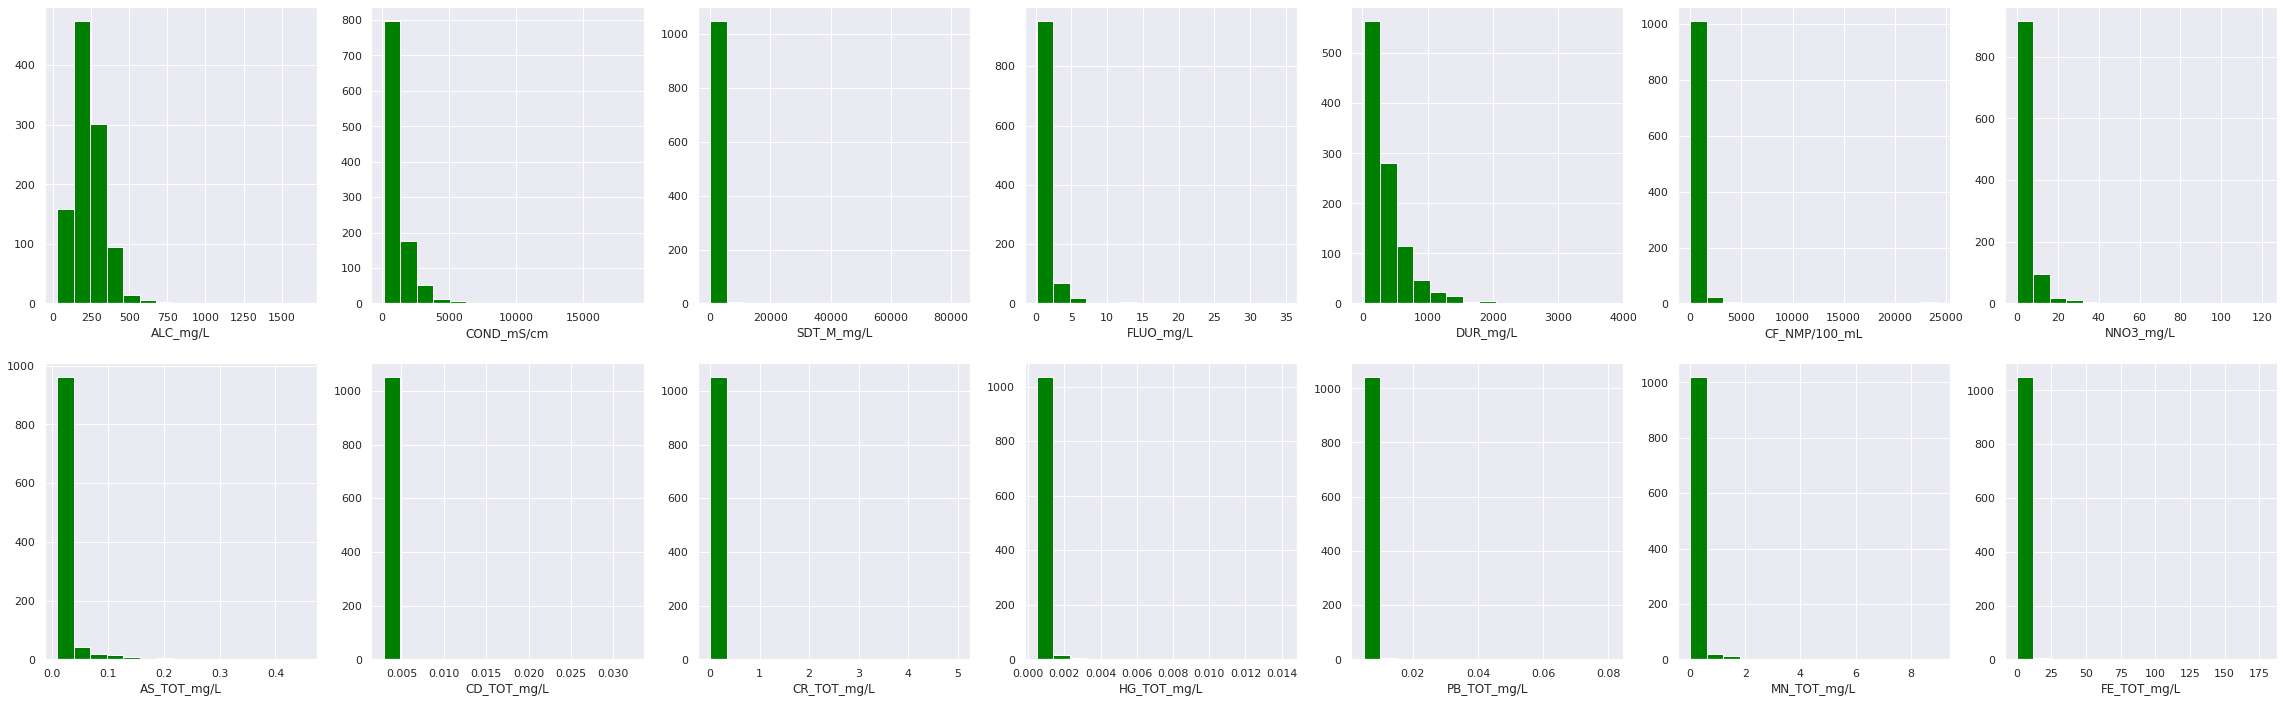

In [66]:
sns.set(rc={'figure.figsize':(40,12)})
fig, axes = plt.subplots(2, 7)
i = 0
for col in asub[temp_num_nom].columns:
  plt.subplot(2, 7,i+1) 
  plt.hist(asub[col], bins=15,color='green') 
  plt.xlabel(asub[temp_num_nom].columns[i])
  i = i + 1

Vemos que en los graficos se muestra que las variables numericas tienen en su mayoria un sesgo positivo.

Ahora veamos las graficas de Boxplot de cada una:

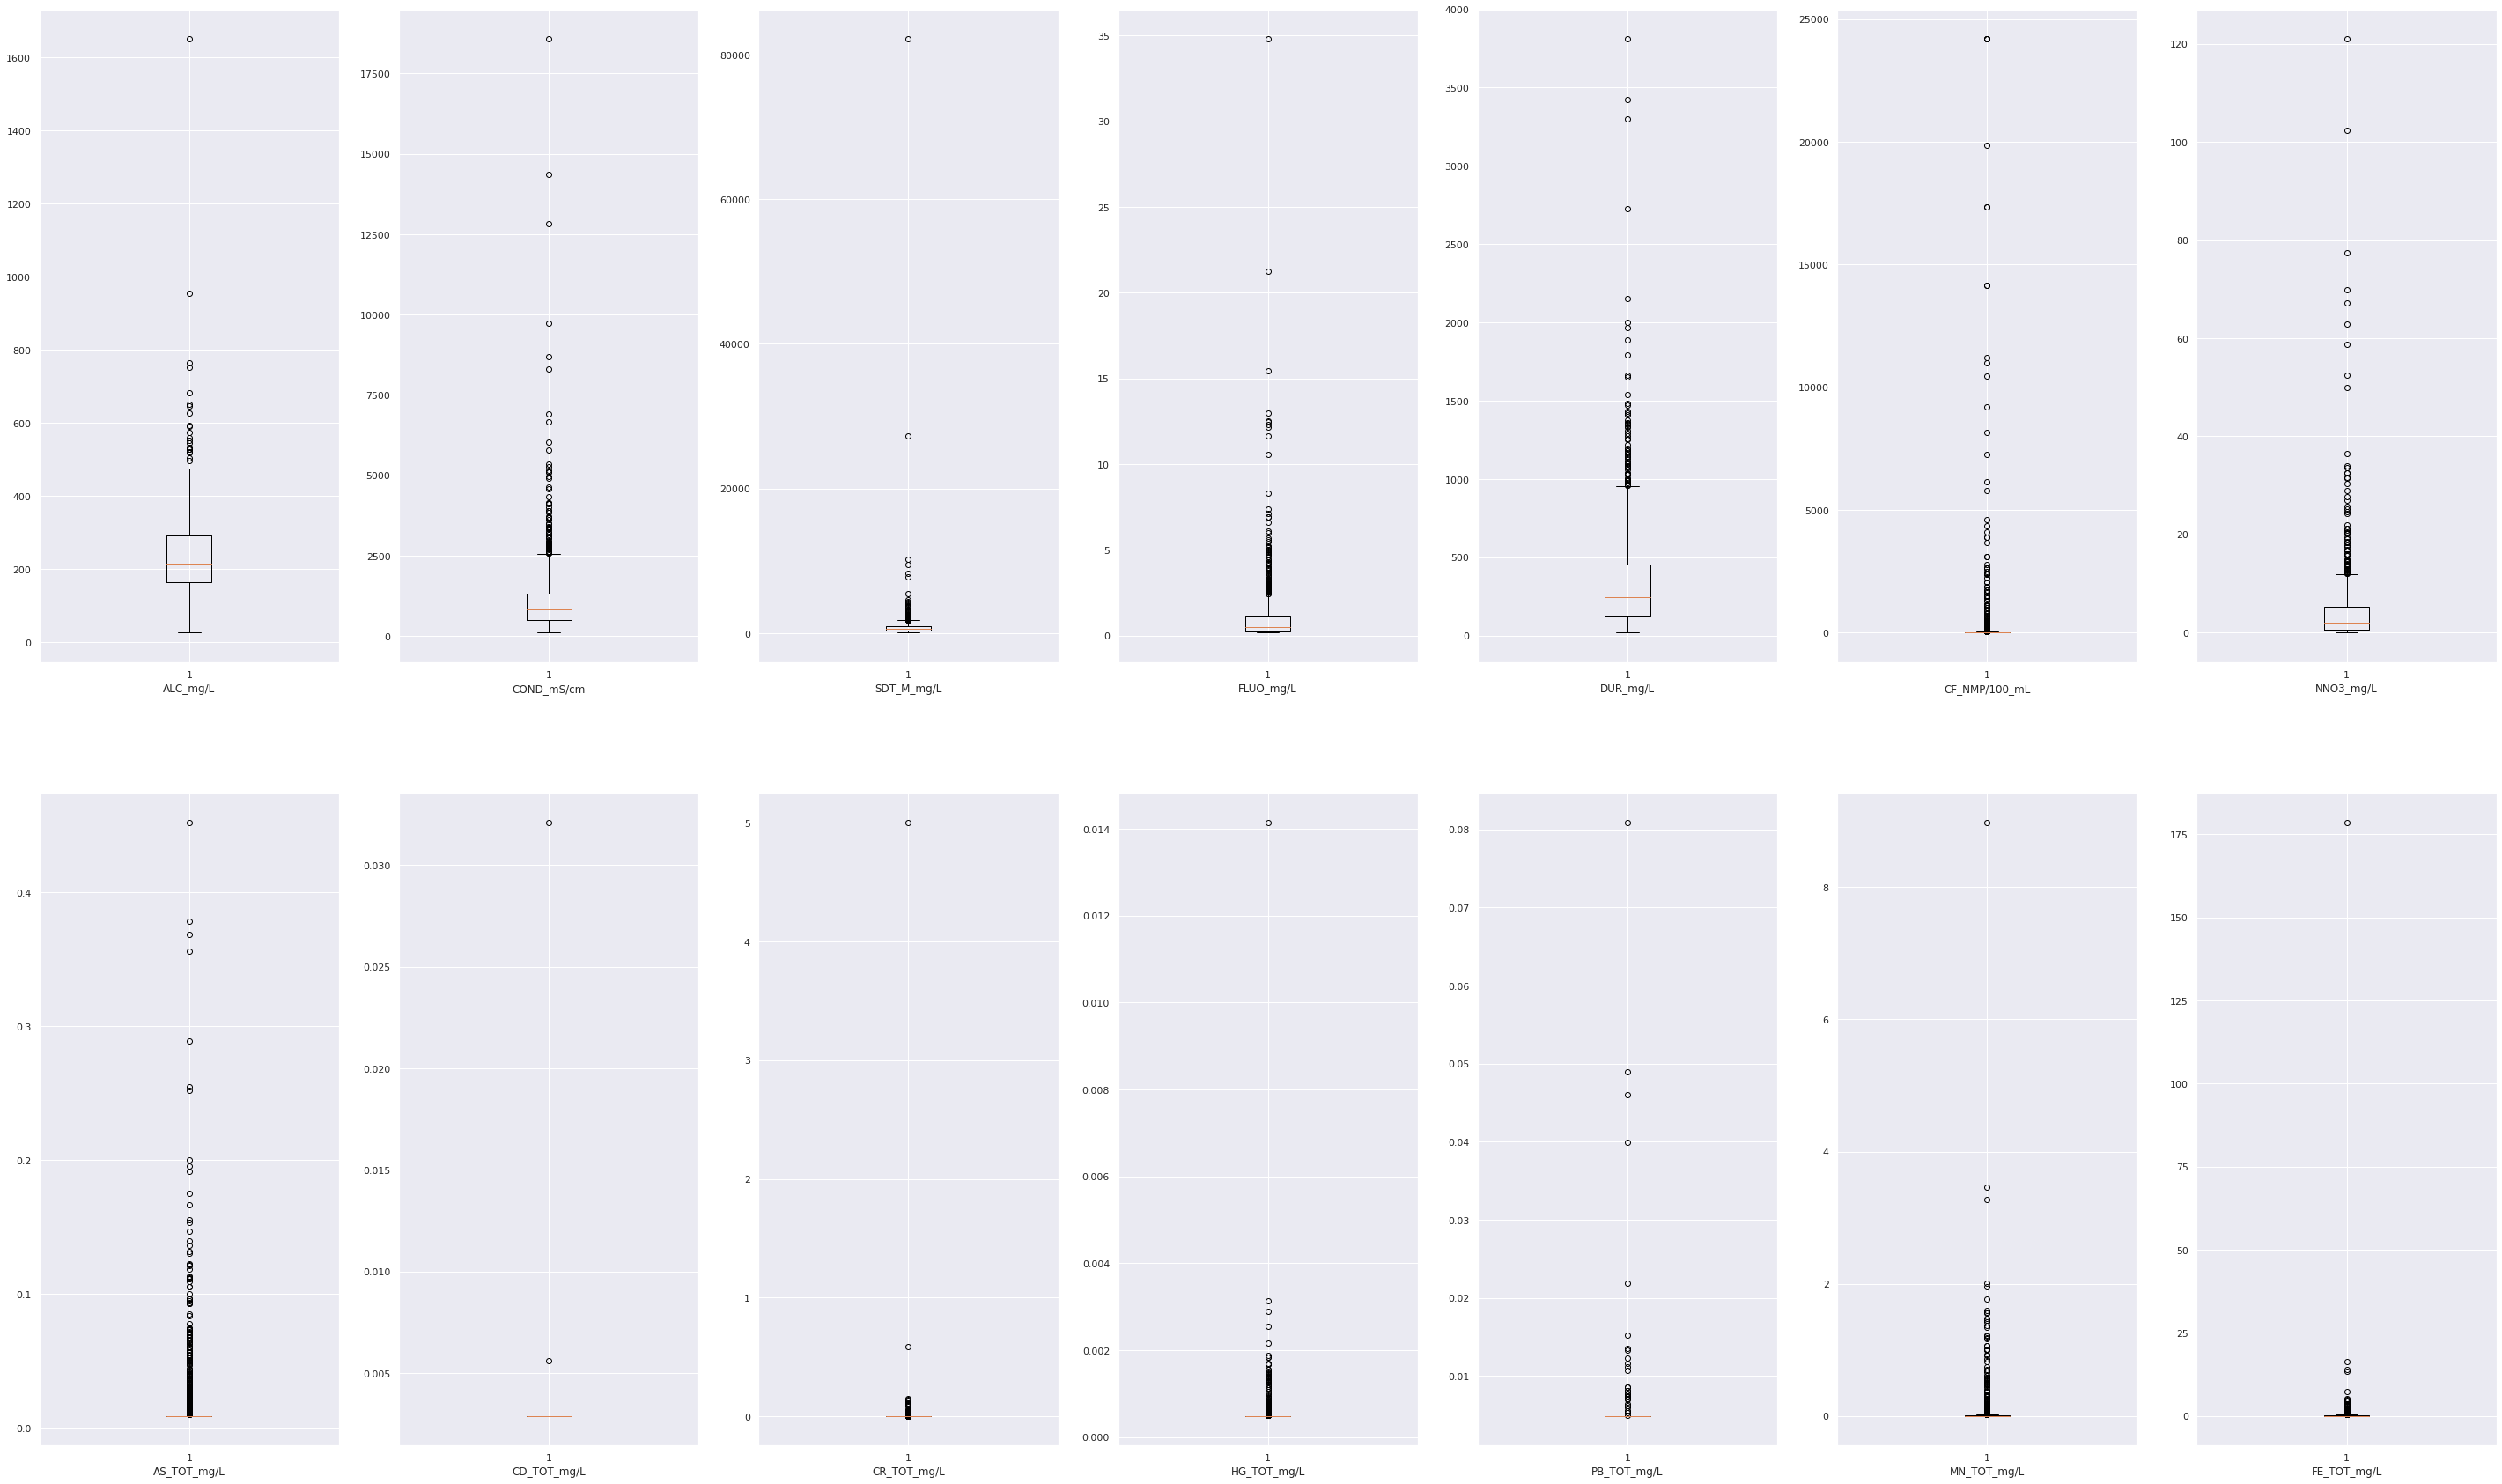

In [32]:
sns.set(rc={'figure.figsize':(50,30)})
fig, axes = plt.subplots(2, 7)
i = 0
for col in asub[temp_num_nom].columns:
  plt.subplot(2, 7,i+1) 
  plt.boxplot(asub[col]) 
  plt.xlabel(asub[temp_num_nom].columns[i])
  i = i + 1


Todas tienen valores extremos en general.

Ahora veamos las graficas de pairplot de las numericas con Y el SEMAFORO.

In [82]:
num_nom_conY = temp_num_nom.copy()
num_nom_conY.append('SEMAFORO')

Cambiamos el dato de SEMAFORO de Object Verde, Amarillo y Rojo a valores 1,2, y 3:

In [77]:
asub['SEMAFORO'].replace({'Verde':1,'Amarillo':2,'Rojo':3},inplace=True)

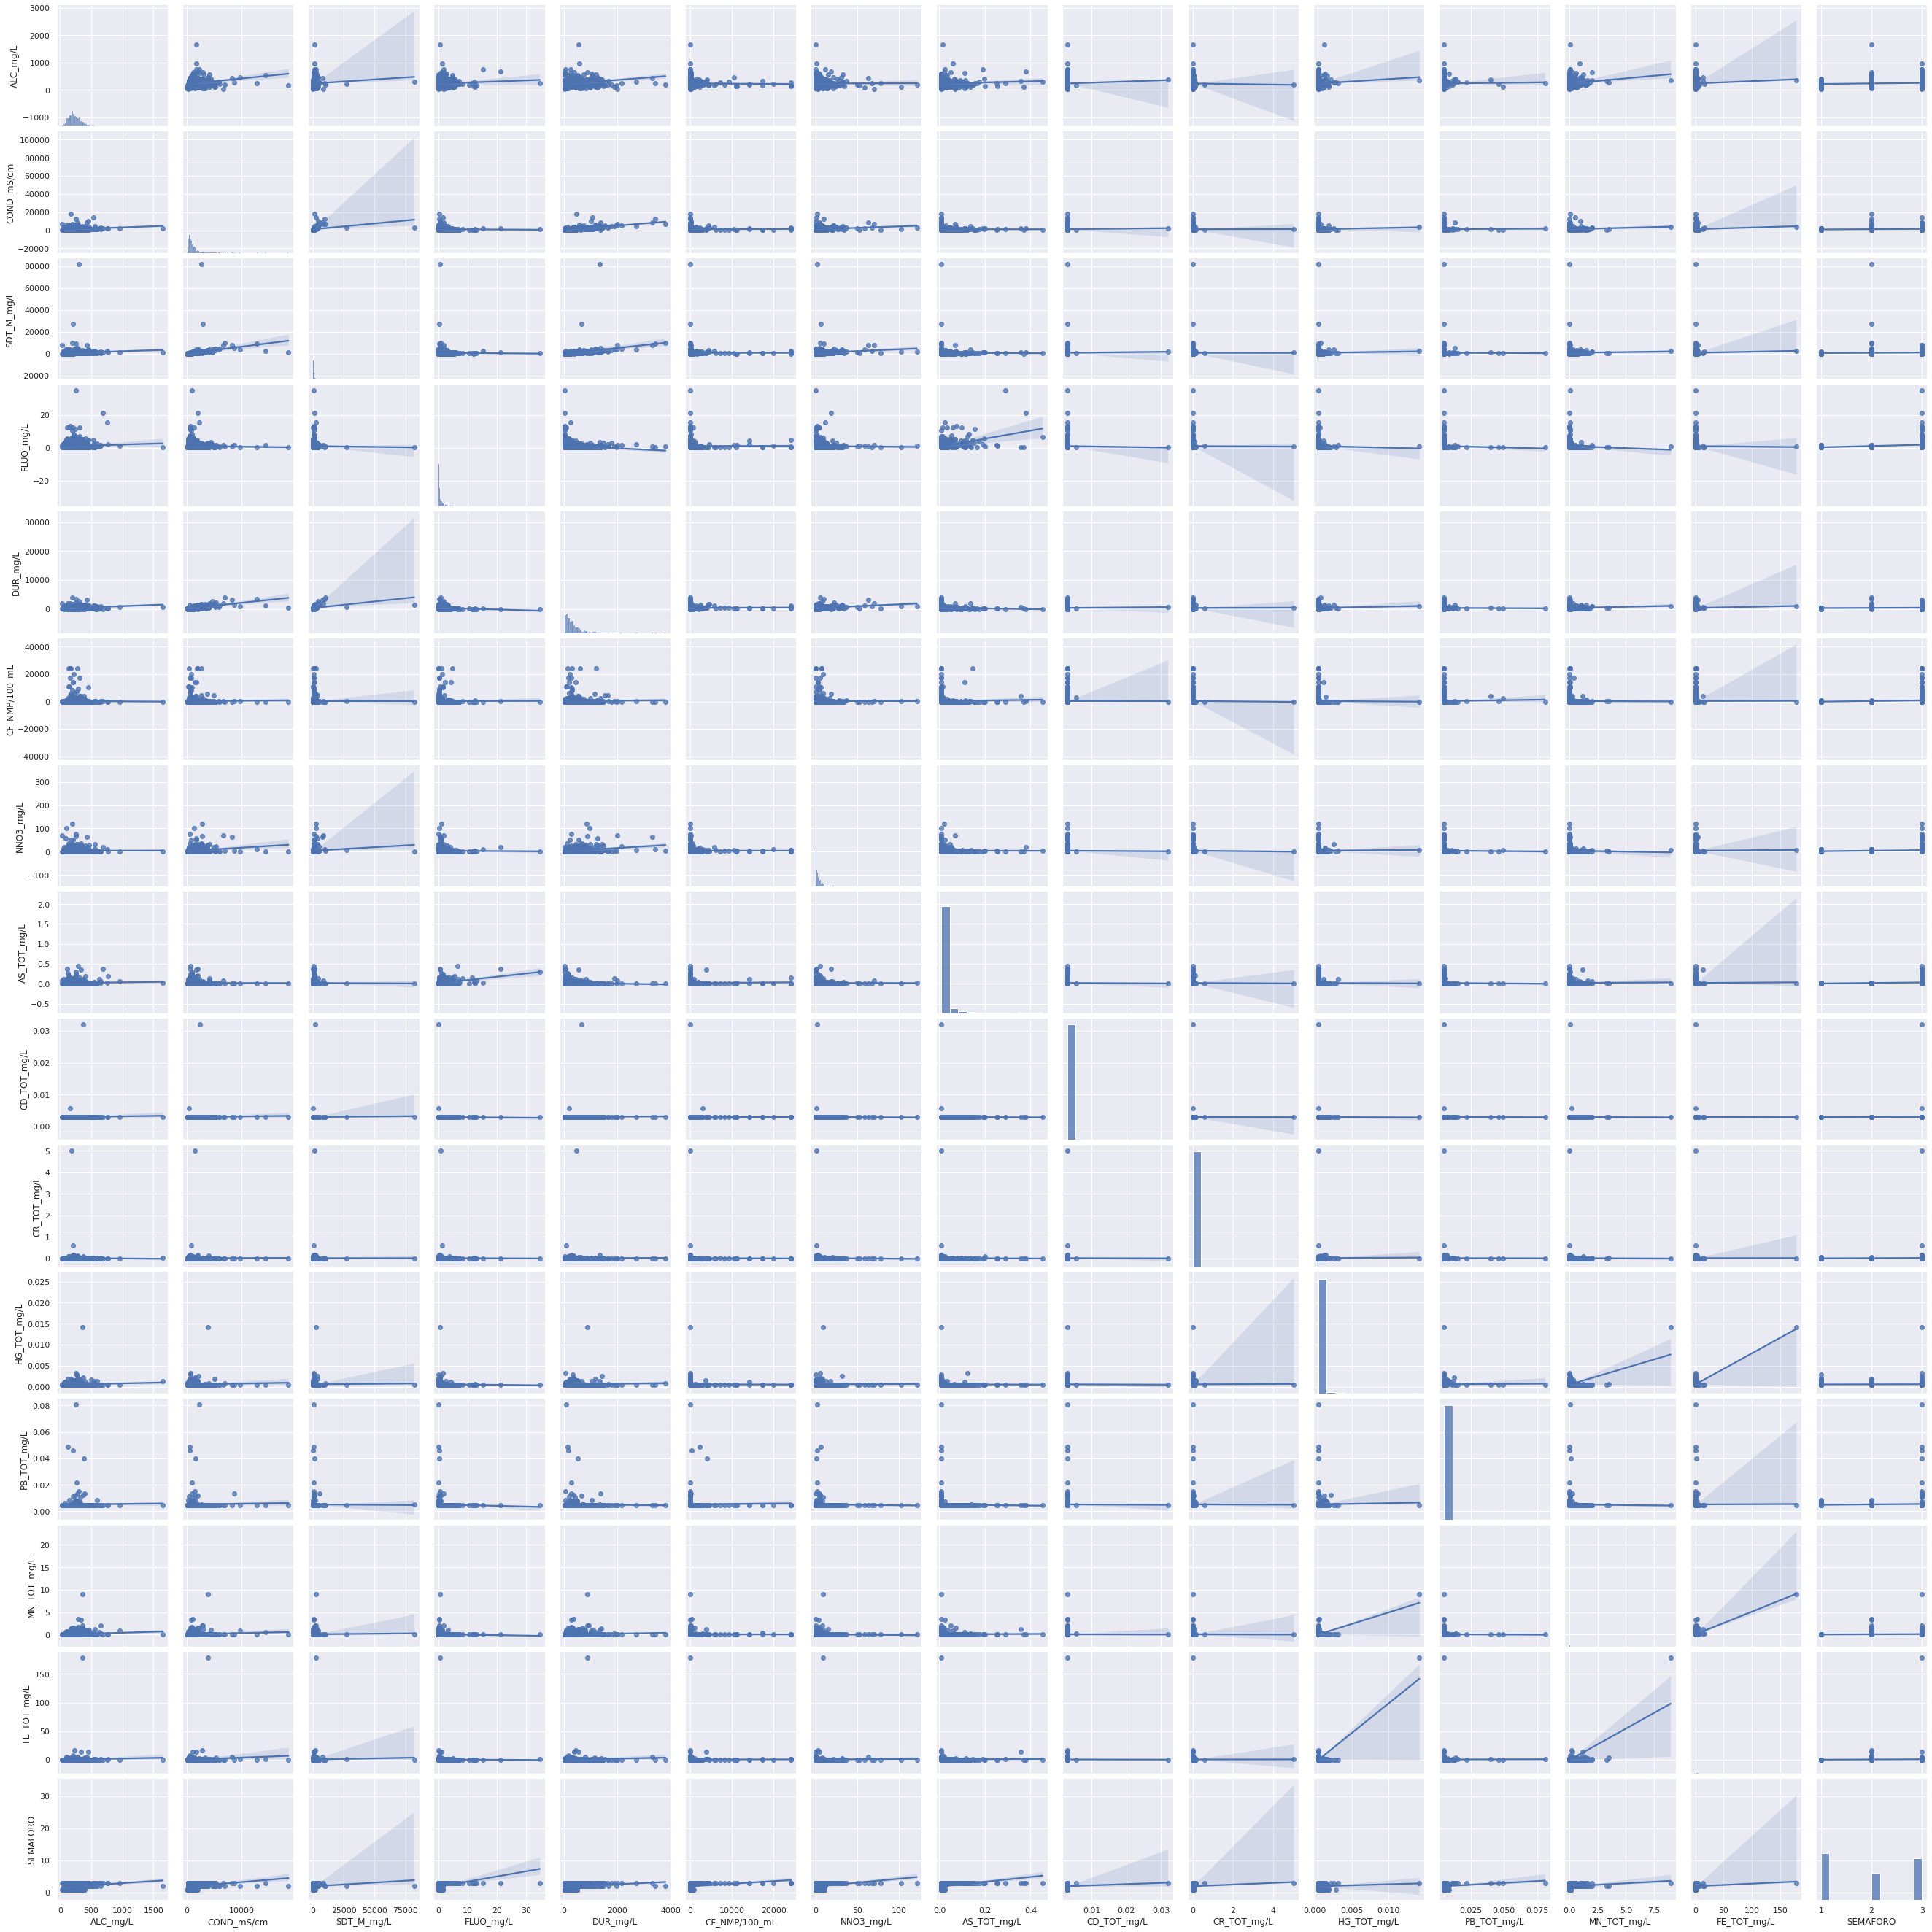

In [85]:
sns.pairplot(asub[num_nom_conY],kind='reg')


Veamos un mapa de correlacion de las numericas con el SEMAFORO

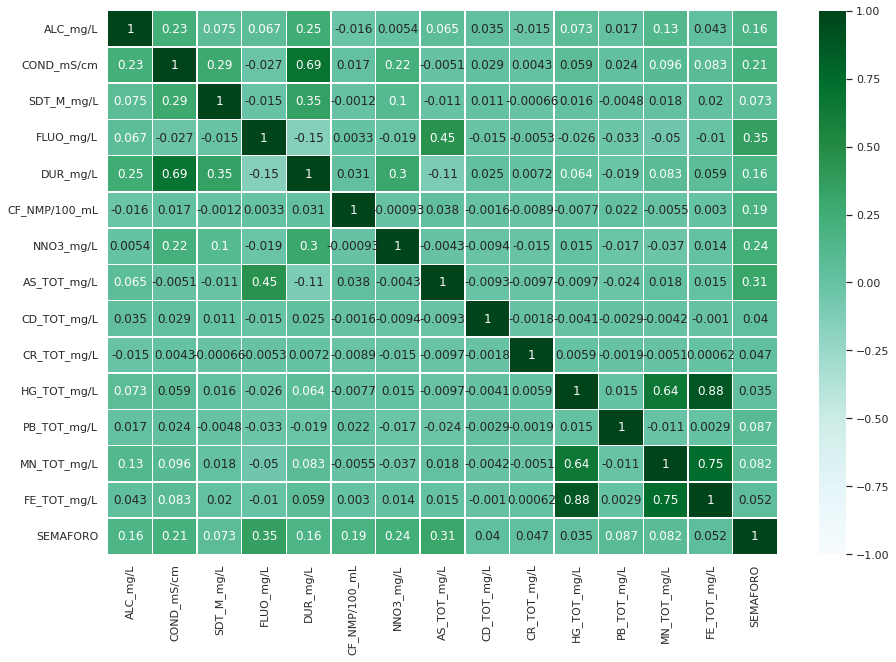

In [86]:
corr_num = asub[num_nom_conY].corr()

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corr_num, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)




Del mapa anterior podemos ver que las 5 correlaciones mas fuertes son:

FE_TOT_mg/L con HG_TOT_mg/L con 0.88, 

FE_TOT_mg/L con MN_TOT_mg/L con  0.75,

DUR_mg/L con COND_mS/cm con 0.69,

MN_TOT_mg/L con  HG_TOT_mg/L con 0.64,

AS_TOT_mg/L con FLUO_mg/L con 0.45

EL SEMAFORO tiene las 5 mayores con : FLUO_mg/L con 0.35, AS_TOT_mg/L con 0.31, MNO3_mg/L con 0.24, COND_mS/cm con 0.21, CF_NMP/100_mL con 0.19.


Veamos ahora un mapa de correlacion de las Categoricas de Calidad con el SEMAFORO.


In [92]:
cal_nom_conY = cal_nom.copy()
cal_nom_conY.append('SEMAFORO')

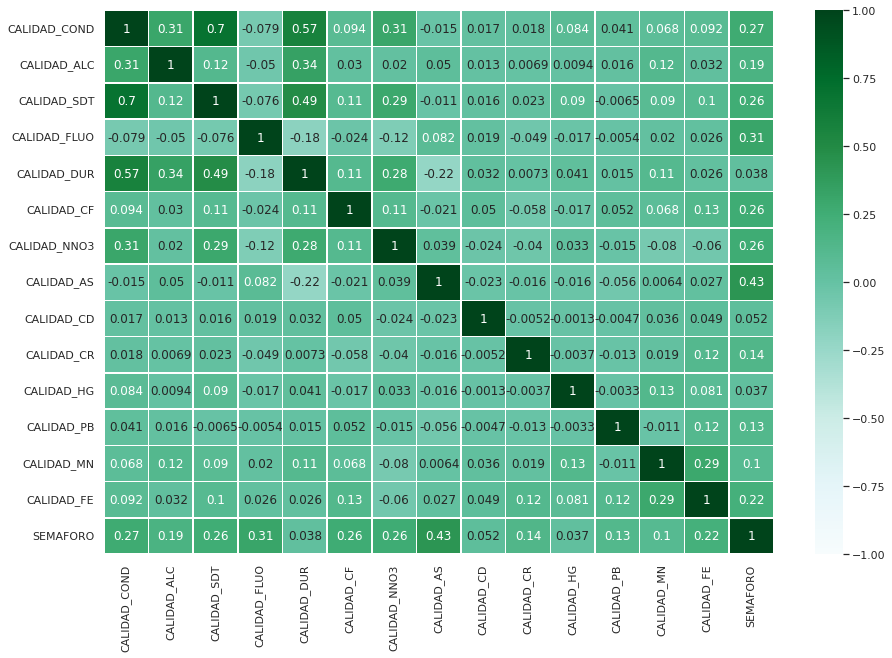

In [93]:
corr_cal = asub[cal_nom_conY].corr()

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corr_cal, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)

Del mapa anterior podemos ver que las 6 correlaciones mas fuertes son:

CALIDAD_SDT con CALIDAD_COND con 0.70, 

CALIDAD_DUR con CALIDAD_CONF con 0.57,

CALIDAD_DUR con CALIDAD_SDT con 0.49,

CALIDAD_DUR con CALIDAD_ALC con 0.34,

CALIDAD_ALC con CALIDAD_COND con 0.31,

CALIDAD_NNO3 con CALIDAD_COND con 0.31,


EL SEMAFORO tiene las 6 mayores con : CALIDAD_AS con 0.43, CALIDAD_FLUO con 0.31, CALIDAD_COND con 0.27, CALIDAD_SDT con 0.26, CALIDAD_CF con 0.26, CALIDAD_NNO3 con 0.26


Veamos un mapa de correlacion de las numericas y las categoricas de calidad con el semaforo

In [87]:
num_nom_cat=num_nom_conY+cal_nom

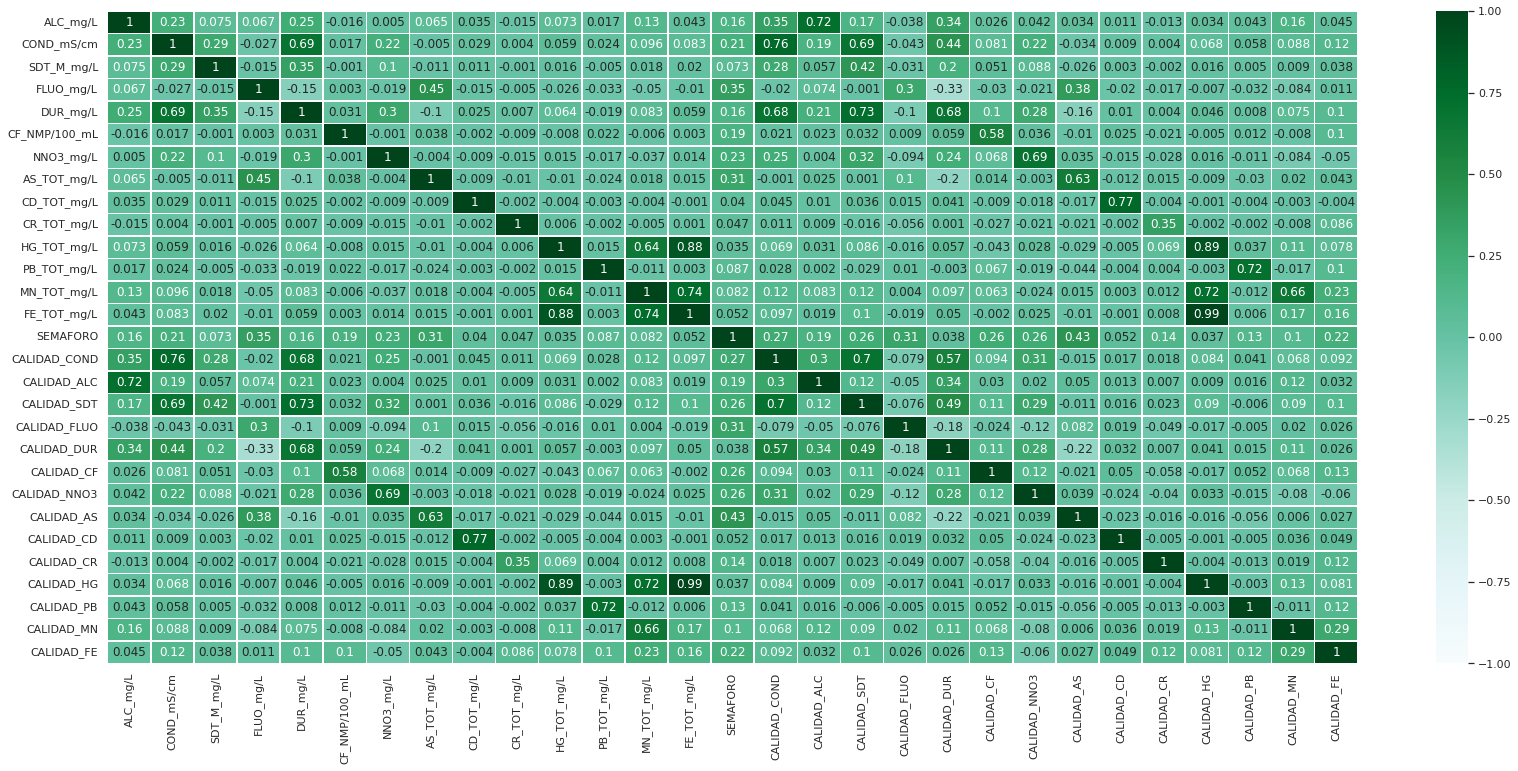

In [91]:
corr_num_cat = asub[num_nom_cat].corr().round(3)

sns.set(rc = {'figure.figsize':(28,12)})
sns.heatmap(corr_num_cat, vmin = -1, vmax = 1, cmap = "BuGn", annot= True, linewidths=0.5)


Del mapa anterior podemos ver que las 10 correlaciones mas fuertes son:

CALIDAD_HG con FE_TOT_mg/L con 0.99,

CALIDAD_HG con HG_TOT_mg/L con 0.89,

FE_TOT_mg/L con HG_TOT_mg/L con  0.88,

CALIDAD_CD con CD_TOT_mg/L con 0.77,

CALIDAD_COND con COND_mS/cm con 0.76,

CALIDAD SDT con DUR_mg/L con 0.73,

CALIDAD_ALC con ALC_mg/L con 0.72,

CALIDAD_PB con PB_TOT_mg/L con 0.72,

CALIDAD_HG con  MN_TOT_MG/L con 0.72

CALIDAD_SDT con CALIDAD_COND con 0.70;



EL SEMAFORO tiene las 11 mayores con : FLUO_mg/L con 0.35, AS_TOT_mg/L con 0.31, MNO3_mg/L con 0.24, COND_mS/cm con 0.21, CF_NMP/100_mL con 0.19.

CALIDAD_AS con 0.43, CALIDAD_FLUO con 0.31, CALIDAD_COND con 0.27, CALIDAD_SDT con 0.26, CALIDAD_CF con 0.26, CALIDAD_NNO3 con 0.26


## **Aguas superficiales**

In [ ]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

df_asup = zip_to_df(url,'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',',')
df_asup.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
df_asup.shape

(4141, 55)